In [48]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
# Generate data
# Bias the data along some chosen directions
pc1 = (-1+2*np.random.random(8))
pc1 = pc1/np.linalg.norm(pc1)
pc2 = (-1+2*np.random.random(8))
pc2 = pc2/(2*np.linalg.norm(pc2))
pc3 = (-1+2*np.random.random(8))
pc3 = pc3/(4*np.linalg.norm(pc3))
pc4 = (-1+2*np.random.random(8))
pc4 = pc4/(8*np.linalg.norm(pc4))
data = np.zeros((5000, 8))
coeffdata = np.zeros((5000, 4))
for i in range(1000):
    coeffs = (-1 + 2*np.random.random(4))
    coeffdata[i] = coeffs
    data[i] = pc1 * coeffs[0] + pc2 * coeffs[1] + pc3 * coeffs[2] + pc4 * coeffs[3]

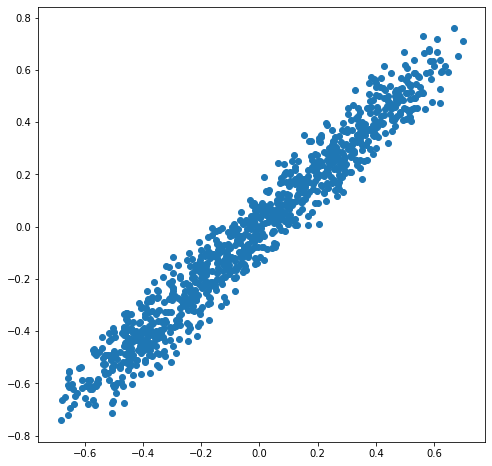

In [226]:
plt.figure(figsize=(8,8))
plt.scatter(data[:, 0], data[:, 1])

In [248]:
# Make the network
ae = Sequential()
ae.add(Input(8))
ae.add(Dense(4, use_bias=False, activation='linear', kernel_initializer='orthogonal'))
ae.add(Dense(8, use_bias=False, activation='linear', kernel_initializer='orthogonal'))
ae.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
ae.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_61 (Dense)             (None, 8)                 32        
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [249]:
# As an autoencoder, train x and train y are the same
h = ae.fit(data, data, epochs = 100)

Train on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 1s 120us/sample - loss: 0.0093 - accuracy: 0.8516
Epoch 2/100
5000/5000 [==============================] - 0s 82us/sample - loss: 0.0044 - accuracy: 0.8920
Epoch 3/100
5000/5000 [==============================] - 0s 85us/sample - loss: 0.0024 - accuracy: 0.9330
Epoch 4/100
5000/5000 [==============================] - 0s 83us/sample - loss: 0.0015 - accuracy: 0.9402
Epoch 5/100
5000/5000 [==============================] - 0s 84us/sample - loss: 9.3847e-04 - accuracy: 0.9466
Epoch 6/100
5000/5000 [==============================] - 0s 86us/sample - loss: 5.7538e-04 - accuracy: 0.9590
Epoch 7/100
5000/5000 [==============================] - 0s 86us/sample - loss: 3.7617e-04 - accuracy: 0.9666
Epoch 8/100
5000/5000 [==============================] - 0s 77us/sample - loss: 2.8748e-04 - accuracy: 0.9724
Epoch 9/100
5000/5000 [==============================] - 0s 78us/sample - loss: 2.4392e-04 - accuracy: 0.9746
Epo

5000/5000 [==============================] - 0s 66us/sample - loss: 3.9200e-07 - accuracy: 0.9996
Epoch 75/100
5000/5000 [==============================] - 0s 68us/sample - loss: 6.0936e-12 - accuracy: 1.0000
Epoch 76/100
5000/5000 [==============================] - 0s 67us/sample - loss: 8.2396e-15 - accuracy: 1.0000
Epoch 77/100
5000/5000 [==============================] - 0s 65us/sample - loss: 7.5264e-17 - accuracy: 1.0000
Epoch 78/100
5000/5000 [==============================] - 0s 66us/sample - loss: 8.7938e-17 - accuracy: 1.0000
Epoch 79/100
5000/5000 [==============================] - 0s 66us/sample - loss: 8.1368e-17 - accuracy: 1.0000
Epoch 80/100
5000/5000 [==============================] - 0s 69us/sample - loss: 8.2248e-17 - accuracy: 1.0000
Epoch 81/100
5000/5000 [==============================] - 0s 66us/sample - loss: 8.8444e-17 - accuracy: 1.0000
Epoch 82/100
5000/5000 [==============================] - 0s 69us/sample - loss: 1.5754e-16 - accuracy: 1.0000
Epoch 83/100
5

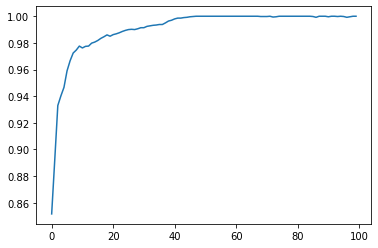

In [250]:
plt.plot(h.history['accuracy'])

In [251]:
print(np.matmul(np.transpose(ae.weights[0][:,:]), np.transpose(data[0:1])))
print(np.transpose(coeffdata[0:1]))

[[ 0.293]
 [-0.383]
 [ 0.38 ]
 [-0.804]]
[[ 0.923]
 [-0.921]
 [ 0.896]
 [ 0.243]]


In [252]:
print(pc1)
print(pc2)
print(pc3)
print(pc4)
print(ae.weights[0][:,0])
print(ae.weights[0][:,1])
print(ae.weights[0][:,2])
print(ae.weights[0][:,3])

[-0.581 -0.601  0.301  0.046 -0.329 -0.26   0.069 -0.17 ]
[-0.115 -0.028 -0.182  0.097  0.214  0.199  0.232 -0.232]
[ 0.037  0.12   0.143  0.064 -0.038 -0.133  0.012  0.055]
[ 0.013  0.066  0.018 -0.038  0.016  0.06   0.061  0.041]
tf.Tensor([-0.021 -0.445  0.097  0.958  0.047 -0.361  0.881 -0.076], shape=(8,), dtype=float32)
tf.Tensor([-0.092 -0.257 -0.752 -0.102  0.473 -0.397 -0.191 -0.604], shape=(8,), dtype=float32)
tf.Tensor([-0.437 -0.505  0.551 -0.495  0.058  0.398  0.154 -0.467], shape=(8,), dtype=float32)
tf.Tensor([ 0.227  0.329 -0.323  0.338 -0.091  0.723  0.384 -0.127], shape=(8,), dtype=float32)


In [253]:
rv = (np.random.randn(1)*pc1 + np.random.randn(1)*pc2 + np.random.randn(1)*pc3 + np.random.randn(1)*pc4).reshape(1, 8)
ae.predict(rv) - rv
# It seems to be able to handle arbitrary combinations of the PCs well enough.
# But the internal representation is not the same as any of them.
# The span of the internal representation seems to be about the same as the span of the first few principal components, though.

array([[ 7.694e-05,  2.118e-04, -5.416e-06, -3.195e-05,  1.591e-04,
         1.794e-04,  2.574e-04,  6.560e-05]])

In [256]:
reps = np.zeros((len(data), 4))

In [258]:
for i in range(len(data)):
    reps[i] = np.matmul(np.transpose(ae.weights[0][:,:]), np.transpose(data[i:(i+1)])).reshape(4)

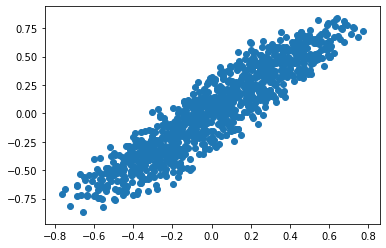

In [266]:
plt.scatter(reps[:,0], reps[:,2])